In [7]:
import project1 as p1
import utils
import numpy as np

In [8]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)


theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


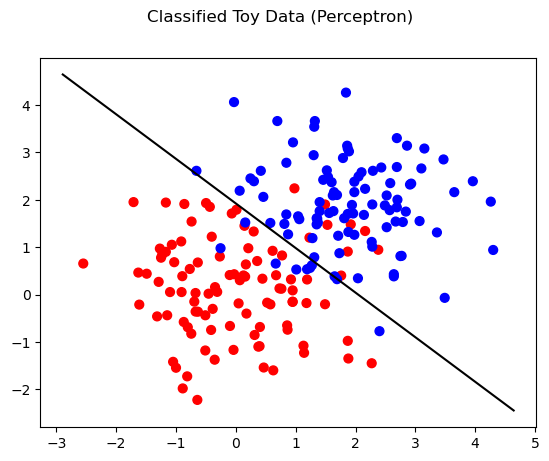

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


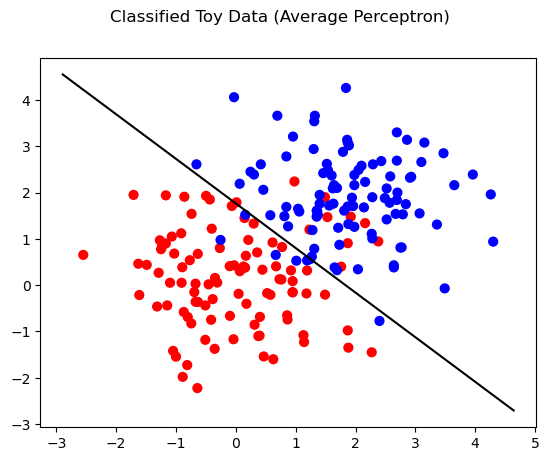

theta for Pegasos is 0.7346463119064058, 0.6300224592973828
theta_0 for Pegasos is -1.2195071848898564


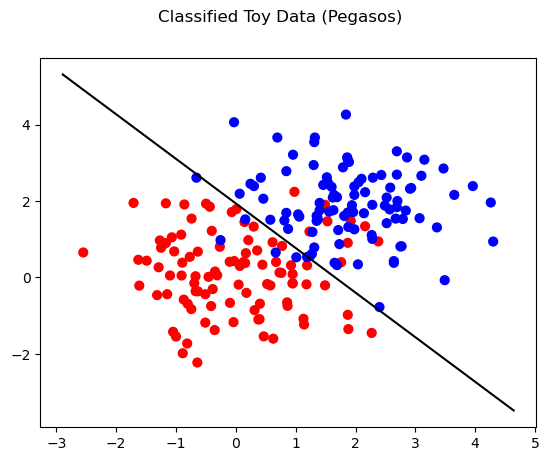

In [9]:
#-------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)


In [10]:
#-------------------------------------------------------------------------------
# Problem 7
#-------------------------------------------------------------------------------

T = 10
L = 0.01

pct_train_accuracy, pct_val_accuracy = \
   p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = \
   p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = \
   p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))



Training accuracy for perceptron:   0.8157
Validation accuracy for perceptron: 0.7160
Training accuracy for average perceptron:   0.9728
Validation accuracy for average perceptron: 0.7980
Training accuracy for Pegasos:                     0.9143
Validation accuracy for Pegasos:                   0.7900


perceptron valid: [(1, 0.758), (5, 0.72), (10, 0.716), (15, 0.778), (25, 0.794), (50, 0.79)]
best = 0.7940, T=25.0000
avg perceptron valid: [(1, 0.794), (5, 0.792), (10, 0.798), (15, 0.798), (25, 0.8), (50, 0.796)]
best = 0.8000, T=25.0000
Pegasos valid: tune T [(1, 0.786), (5, 0.78), (10, 0.79), (15, 0.802), (25, 0.806), (50, 0.8)]
best = 0.8060, T=25.0000
Pegasos valid: tune L [(0.001, 0.786), (0.01, 0.806), (0.1, 0.762), (1, 0.568), (10, 0.518)]
best = 0.8060, L=0.0100


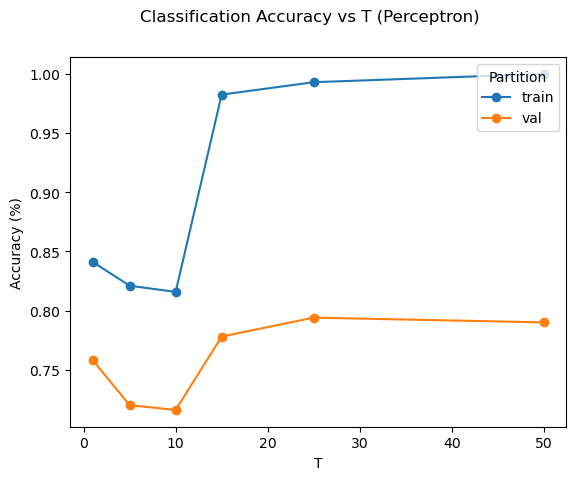

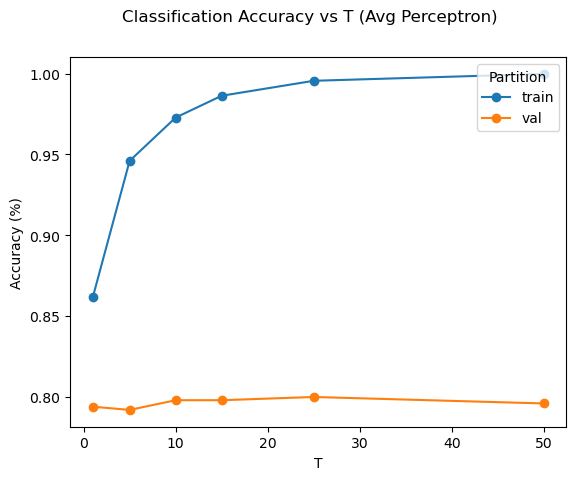

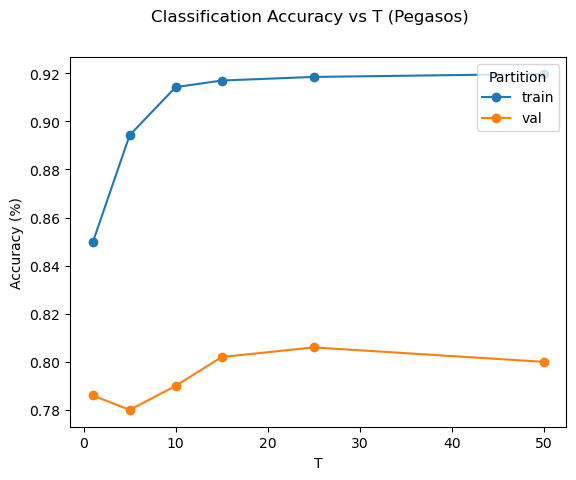

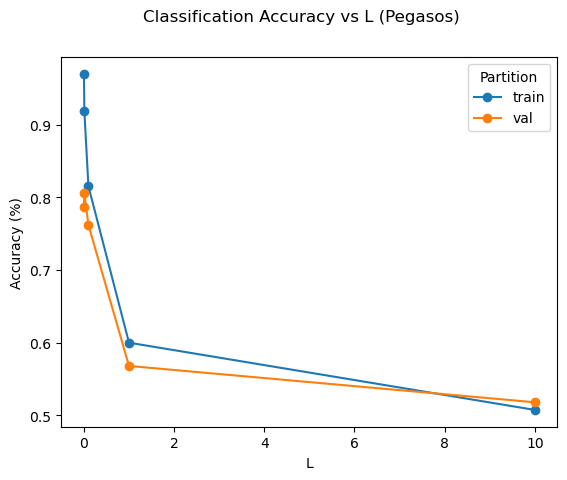

In [11]:
#-------------------------------------------------------------------------------
# Problem 8
#-------------------------------------------------------------------------------

data = (train_bow_features, train_labels, val_bow_features, val_labels)

# values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)


In [19]:
#-------------------------------------------------------------------------------
# Use the best method (perceptron, average perceptron or Pegasos) along with
# the optimal hyperparameters according to validation accuracies to test
# against the test dataset. The test data has been provided as
# test_bow_features and test_labels.
#-------------------------------------------------------------------------------


best_class = p1.pegasos(train_bow_features,train_labels,25,0.01)
best_predict = p1.classify(test_bow_features,best_class[0],best_class[1])
best_accuracy = p1.accuracy(best_predict,test_labels)
print( "Accuracy: " + str(best_accuracy))

Accuracy: 0.802


In [21]:
#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------

best_theta = best_class[0] # Your code here
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])


Most Explanatory Word Features
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly']
